# Kernel PCA - Non Linear Dimensionality Reduction

* Non-linear dimensionality redcution through the use of kernels

In [2]:
from sklearn.datasets import make_circles

In [3]:
from sklearn.decomposition import PCA, KernelPCA

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
np.random.seed(0)

In [6]:
X, y = make_circles?

Signature:
make_circles(
    n_samples=100,
    *,
    shuffle=True,
    noise=None,
    random_state=None,
    factor=0.8,
)
Docstring:
Make a large circle containing a smaller circle in 2d.

A simple toy dataset to visualize clustering and classification
algorithms.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or tuple of shape (2,), dtype=int, default=100
    If int, it is the total number of points generated.
    For odd numbers, the inner circle will have one point more than the
    outer circle.
    If two-element tuple, number of points in outer circle and inner
    circle.

    .. versionchanged:: 0.23
       Added two-element tuple.

shuffle : bool, default=True
    Whether to shuffle the samples.

noise : float, default=None
    Standard deviation of Gaussian noise added to the data.

random_state : int, RandomState instance or None, default=None
    Determines random number generation for dataset shuffling and noise.
    Pas

In [8]:
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05)

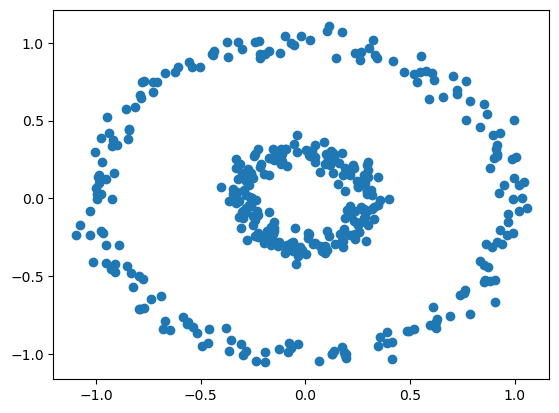

In [14]:
plt.scatter(X[:, 0], X[:, 1]);

* Linear kernel PCA will not work here
* It will not be able to get a straight line through this data

In [18]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

Text(0, 0.5, '$X_2$')

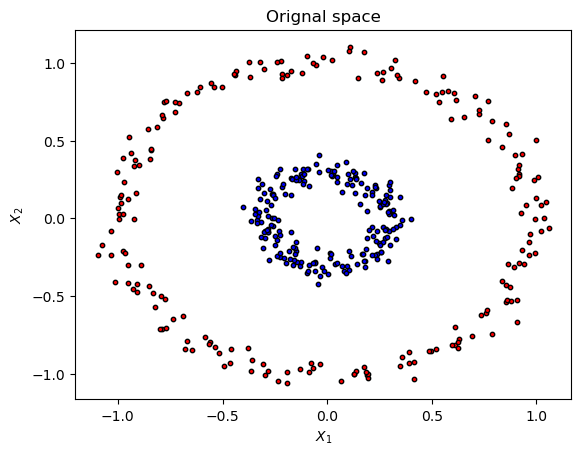

In [24]:
# plotting data
plt.figure()
plt.title("Orignal space")
y = pd.Series(y)
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=10, edgecolor="k")
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=10, edgecolor="k")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

Text(0, 0.5, '2nd principal component')

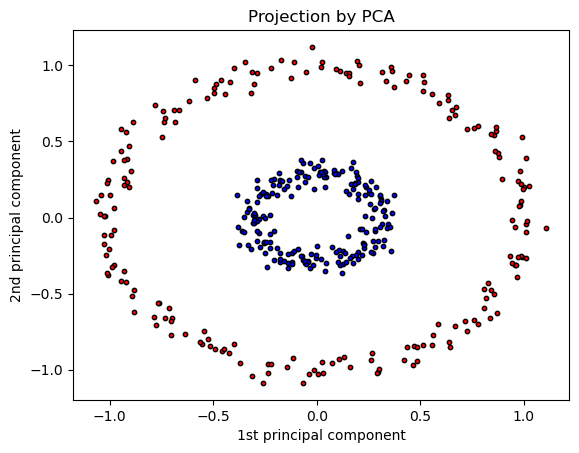

In [27]:
# plotting PCA

plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red", s=10, edgecolor="k")
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue", s=10, edgecolor="k")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")

So PCA was not able to catch any principal component in the data

Text(0, 0.5, '2nd principal component')

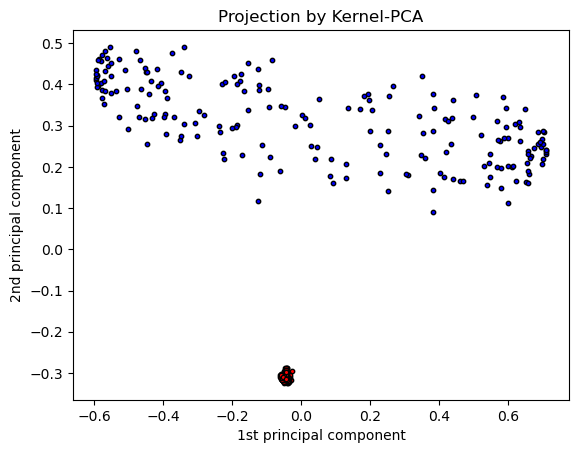

In [28]:
# plotting Kernel-PCA

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=10, edgecolor="k")
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue", s=10, edgecolor="k")
plt.title("Projection by Kernel-PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")

This made it look like in a 3d space and henceforth segregating both 


***

# Kernel PCA Example

In [30]:
import seaborn as sns

In [32]:
df = sns.load_dataset('iris')
df = df[df.species != "setosa"]

In [33]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [34]:
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)                 

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [37]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


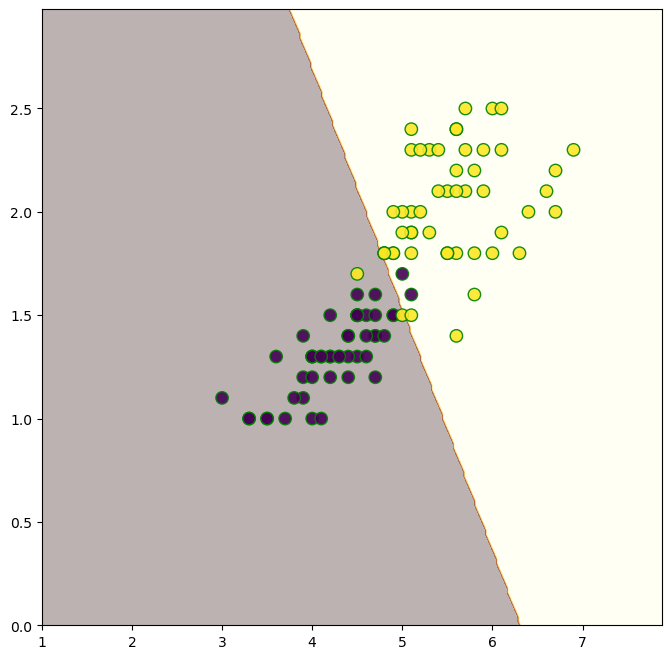

In [38]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [39]:
clf.fit(X_kpca, y)

LogisticRegression()

In [40]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min()- 0.5, Xv.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

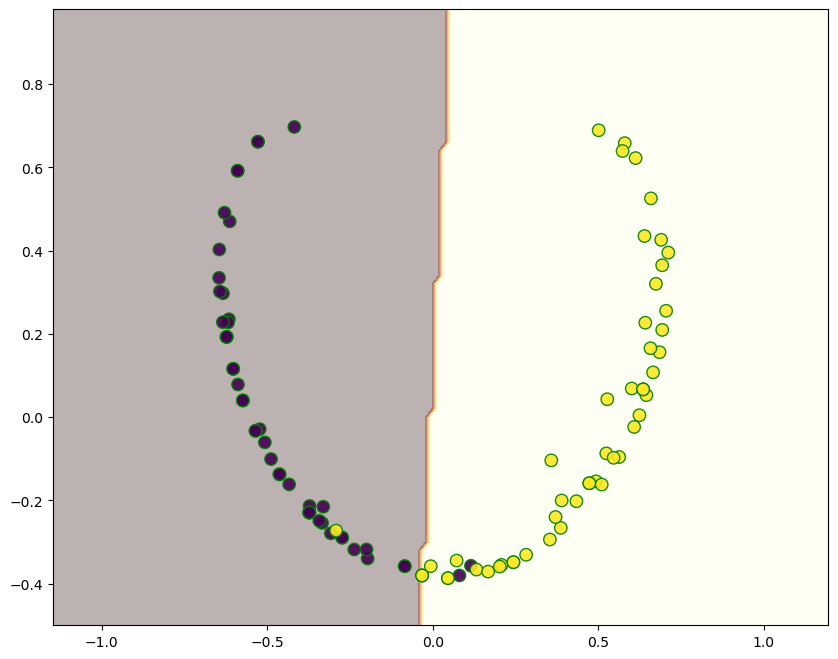

In [41]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, s=80, 
            alpha=0.9, edgecolors='g');